# Dropout and Batch Normalization


#### Dropout and Batch Normalization


<h4>Dropout</h4>
The first of these is the "dropout layer", which can help correct overfitting.

In the last lesson we talked about how overfitting is caused by the network learning spurious patterns in the training data. To recognize these spurious patterns a network will often rely on very a specific combinations of weight, a kind of "conspiracy" of weights. Being so specific, they tend to be fragile: remove one and the conspiracy falls apart.

This is the idea behind dropout. To break up these conspiracies, we randomly drop out some fraction of a layer's input units every step of training, making it much harder for the network to learn those spurious patterns in the training data. Instead, it has to search for broad, general patterns, whose weight patterns tend to be more robust.

#### Adding Dropout
In Keras, the dropout rate argument rate defines what percentage of the input units to shut off. Put the Dropout layer just before the layer you want the dropout applied to:

In [13]:
#import paskages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow import keras

from tensorflow.keras import layers , Sequential

In [14]:
# Set Matplotlib defaults
plt.style.use('seaborn-whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [15]:
#load data
red_wine =  pd.read_csv("data/red-wine.csv")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

In [17]:
# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

###### When adding dropout, you may need to increase the number of units in your Dense layers.



In [6]:
model = Sequential([
            layers.Dense(1024 , activation="relu" , input_shape=[11]),
            layers.Dropout(0.3),
            layers.BatchNormalization(),
            
            layers.Dense(1024 , activation="relu"),
            layers.Dropout(0.3),
            layers.BatchNormalization(),
    
            layers.Dense(1024 , activation="relu"),
            layers.Dropout(0.3),
            layers.BatchNormalization(),
    
            layers.Dense(1)
    
                
            
])

There's nothing to change this time in how we set up the training.



In [18]:
model.compile(
                optimizer="adam",
                loss="mae"
                )

In [28]:
history=model.fit(
            X_train,y_train,
            validation_data=(X_valid,y_valid),
            batch_size=256,
            epochs=100,
                
            verbose=0
            
        )

<AxesSubplot:>

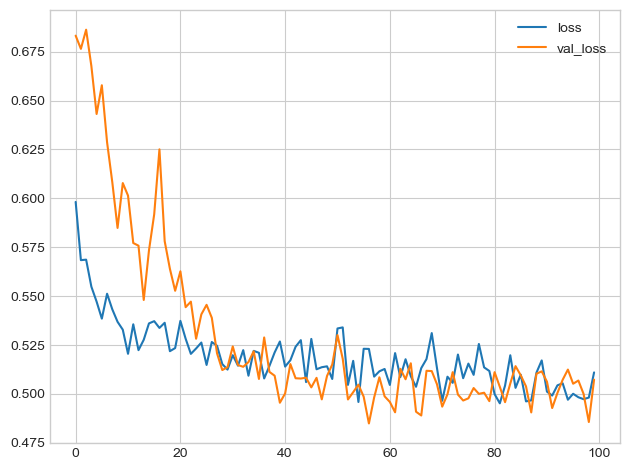

In [29]:
#show learning curves
history_df =  pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot()